# Cervical Cancer Risk Classification

### For Statsly Analytics By Apurva Acharya

#### Problem Statement-

To meet the challenge of the increasing types of disease in this modern era, technology plays a very importantrole in health research. Women's health has become a major concern because of the increasing rates of cervicalcancer because it can be a deadly disease. The cervical tumor is one of the far-reaching sicknesses amongladies in India and around the world. Early analysis is good for better treatment, yet due to vulnerability indetecting cancer cells becoming complex.

 **Machine Learning (ML)** systems can be used to create tools for doctors in the conclusion of cervical growth,which will enormously upgrade the survival rate of patients. Use the classification Machine Learning models topredict cervical growth and look at the execution of the two ML classifiers in terms of accuracy and other falserate measures.
 
Find the accuracy in classifying cervical cancer data on four different types of methods. The cervical cancerdata are represented by 32 risk factors and four target variables: Hinselmann, Schiller, Cytology, and Biopsy.

## Importing Libraries and Modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
data=pd.read_csv("D:\cervical_cancer.csv")

In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
data.shape

(858, 36)

There are 858 rows and 36 columns in the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

## Looking for null values

In [9]:
data.isnull().sum()


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [10]:
data=data.replace(['?'],'0')

In [11]:
data=data.replace(['0.0'],'0')

## Handling Duplicates

In [10]:
dup=data.duplicated().sum()
print(dup)

34


There are 34 duplicate rows in the datset.

In [11]:
#Dropping duplicate data
data.drop_duplicates(keep="first",inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 824 non-null    int64 
 1   Number of sexual partners           824 non-null    object
 2   First sexual intercourse            824 non-null    object
 3   Num of pregnancies                  824 non-null    object
 4   Smokes                              824 non-null    object
 5   Smokes (years)                      824 non-null    object
 6   Smokes (packs/year)                 824 non-null    object
 7   Hormonal Contraceptives             824 non-null    object
 8   Hormonal Contraceptives (years)     824 non-null    object
 9   IUD                                 824 non-null    object
 10  IUD (years)                         824 non-null    object
 11  STDs                                824 non-null    object

Now there are 824 rows and 36 columns.

## Separating the columns into numerical and categorical data

In [13]:
##Splitting the data into categorical and numerical data
category = ['Hinselmann','Citology','Schiller', 'Biopsy']
num = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
cat = ['Smokes','Hormonal Contraceptives','IUD','STDs', 'STDs: Number of diagnosis','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx']

<AxesSubplot:ylabel='Smokes'>

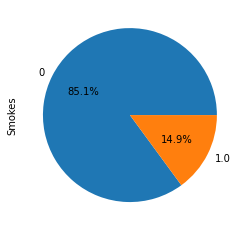

In [14]:
data['Smokes'].value_counts().plot(kind='pie',autopct='%1.1f%%')

14.9% of the women in the given dataset are smokers.

<AxesSubplot:xlabel='Num of pregnancies', ylabel='count'>

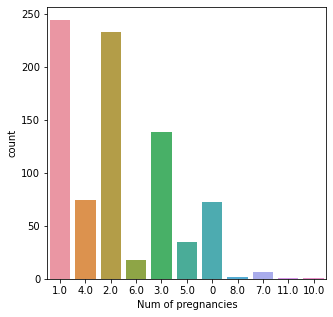

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x="Num of pregnancies",data=data)

Most ladies have been pregnant for 1,2,3 times.

<AxesSubplot:ylabel='Hormonal Contraceptives'>

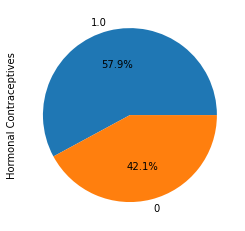

In [16]:
data['Hormonal Contraceptives'].value_counts().plot(kind='pie',autopct='%1.1f%%')

42.1% women in the dataset use Hormonal Contraceptives.

<AxesSubplot:ylabel='IUD'>

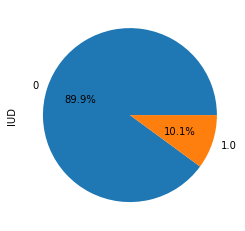

In [17]:
data['IUD'].value_counts().plot(kind='pie',autopct='%1.1f%%')

10.1% women in the dataset use IntraUterine Device.

<AxesSubplot:ylabel='STDs'>

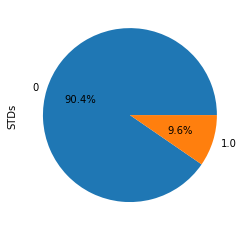

In [18]:
data['STDs'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:>

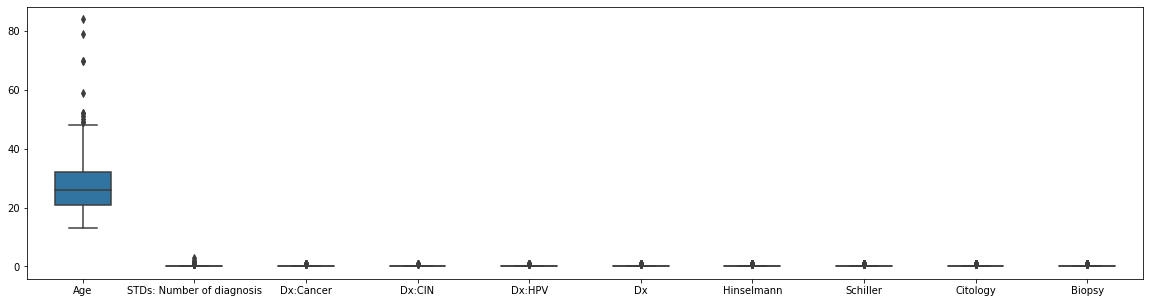

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,width=0.5)

## Univariate

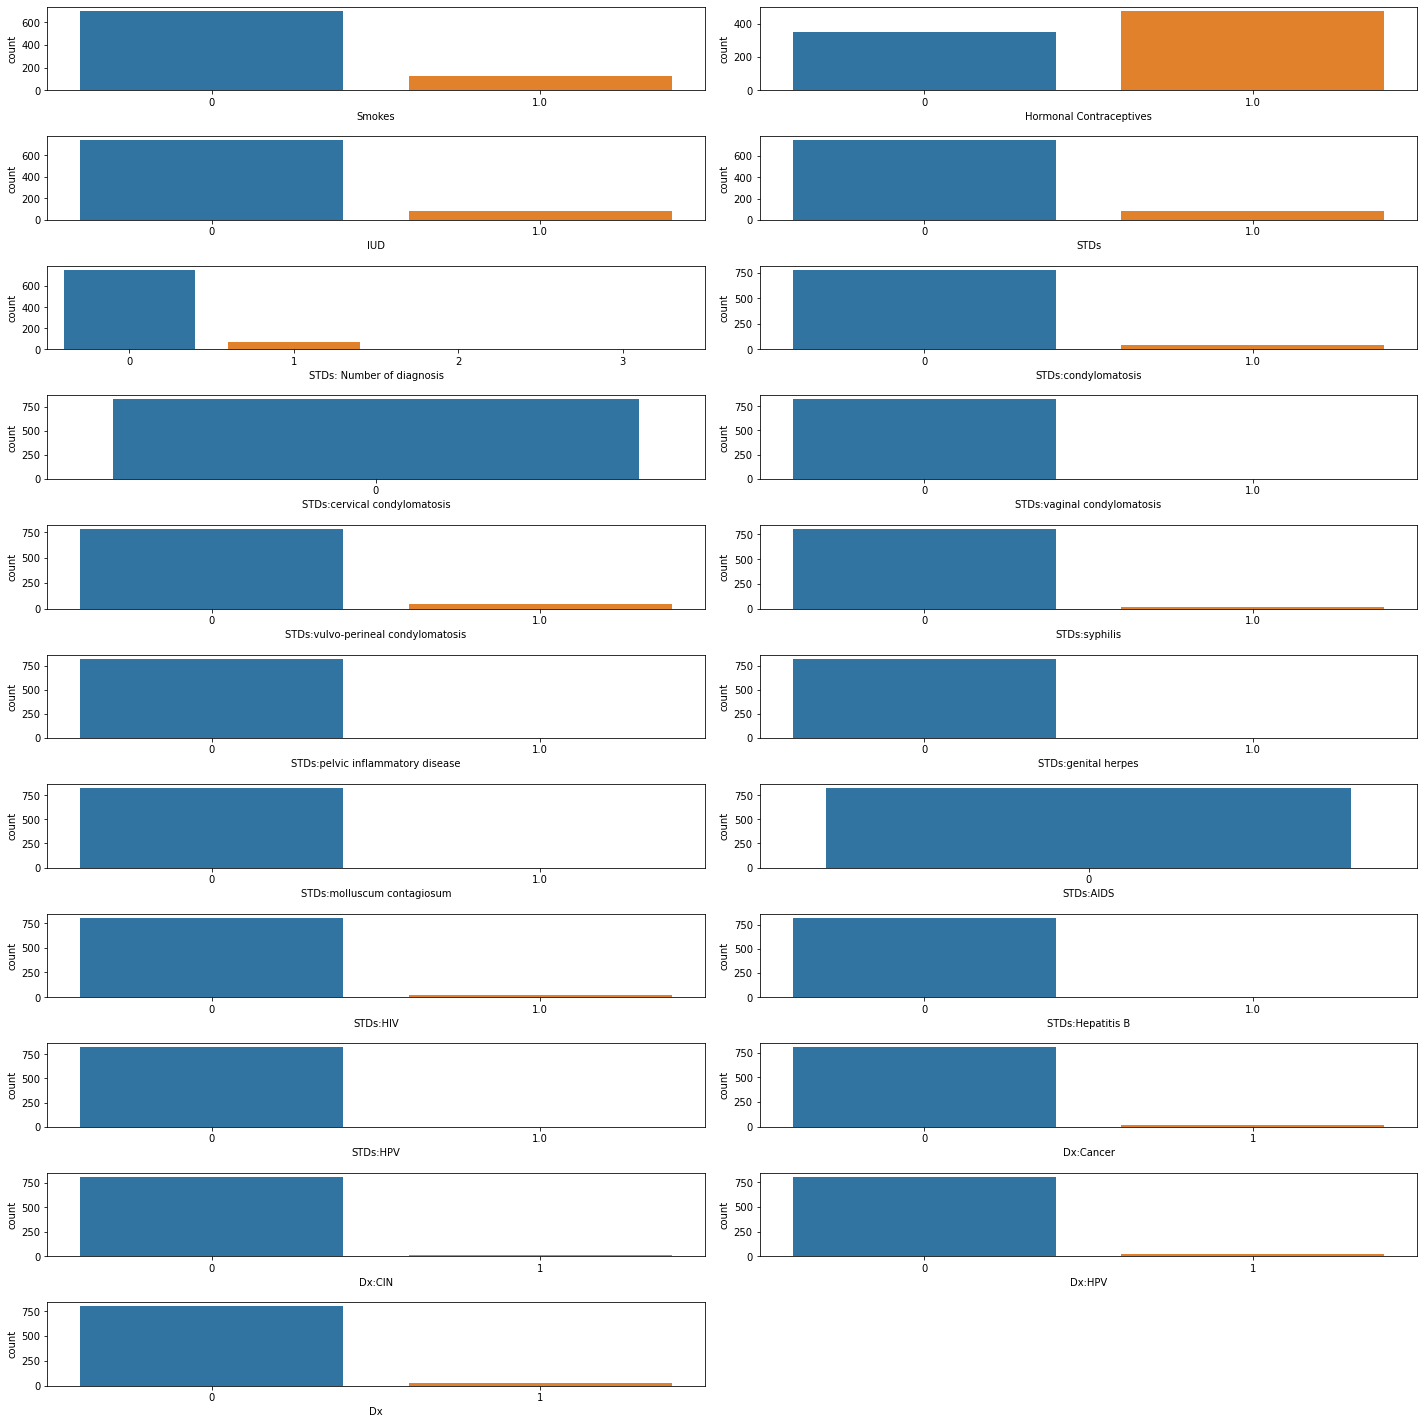

In [20]:
j=1
fig=plt.figure(figsize=(20,20))

for i in cat:
    plt.subplot(11,2,j)
    sns.countplot(x=i,data=data)
    j=j+1
    fig.tight_layout(pad=1.5)   

From the figures, it is seen that Hormonal Contaceptives play an important role in deciding the risk of cervical cancer; while the columns 'STDs:cervical condylomatosis','STDs:AIDS' do not appear of much significance. Also the time of diagnosis should not matter.

In [21]:
data.drop(['STDs:cervical condylomatosis','STDs:AIDS','STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0,0,0,1.0,15.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0,0,0,1.0,8.0,0,...,0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0,0,0,0,1.0,0.08,0,...,0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0,0,0,1.0,0.08,0,...,0,0,0,0,0,0,0,0,0,0


Now there are 32 columns.

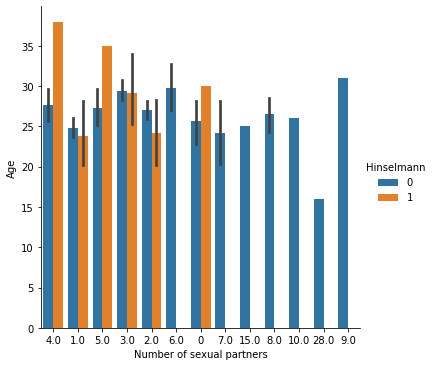

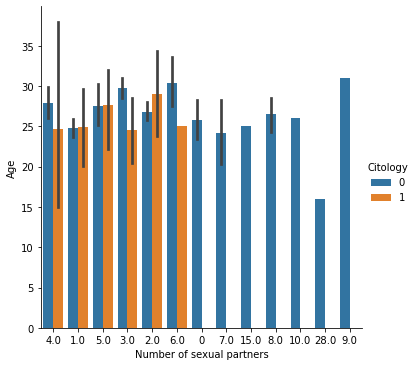

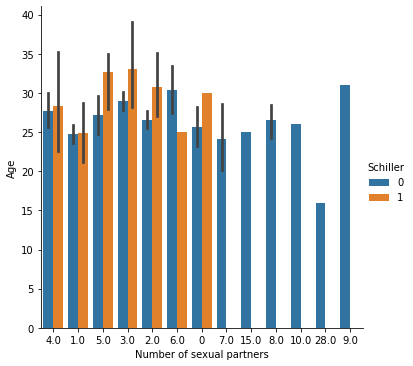

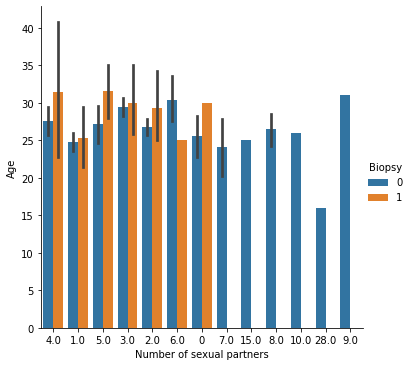

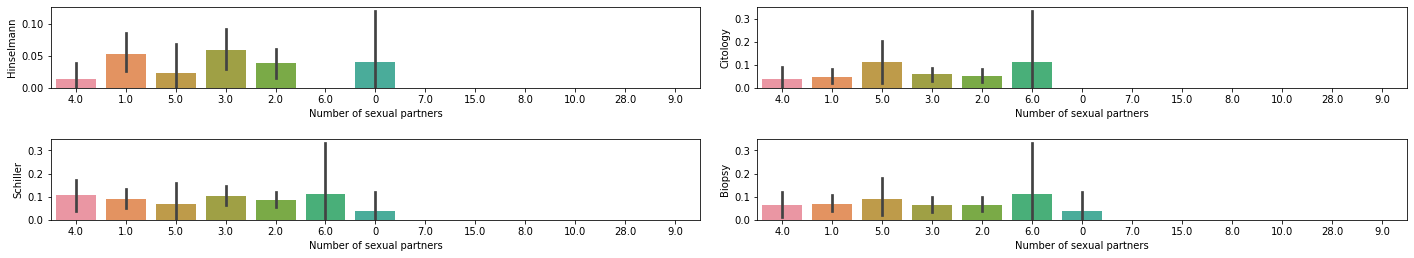

In [22]:
for j in category:
    sns.catplot(x='Number of sexual partners',y='Age',hue=j,data=data,kind='bar')
    
j=1
fig=plt.figure(figsize=(20,20))

for i in category:
    plt.subplot(11,2,j)
    sns.barplot(x='Number of sexual partners',y=i,data=data)
    j=j+1
    fig.tight_layout(pad=2)       

From the figure, more the number of sexual partners, more the risk of cancer.

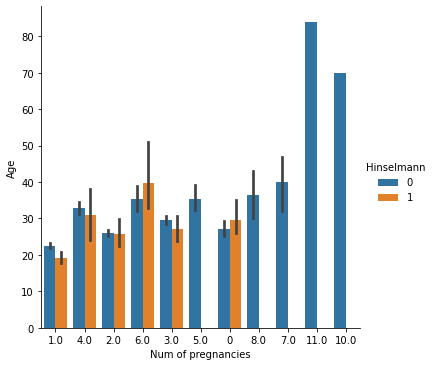

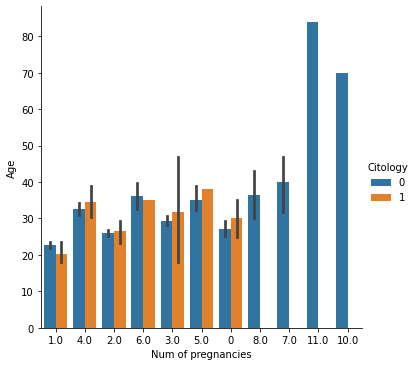

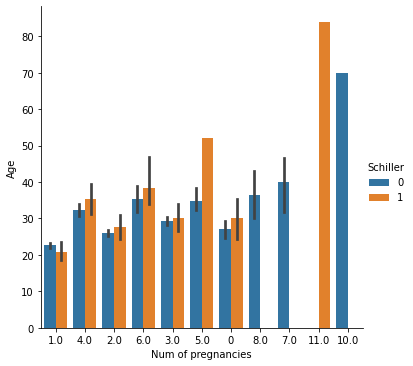

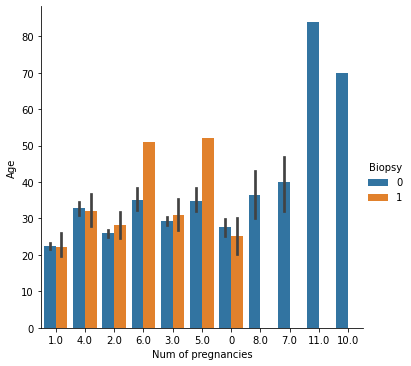

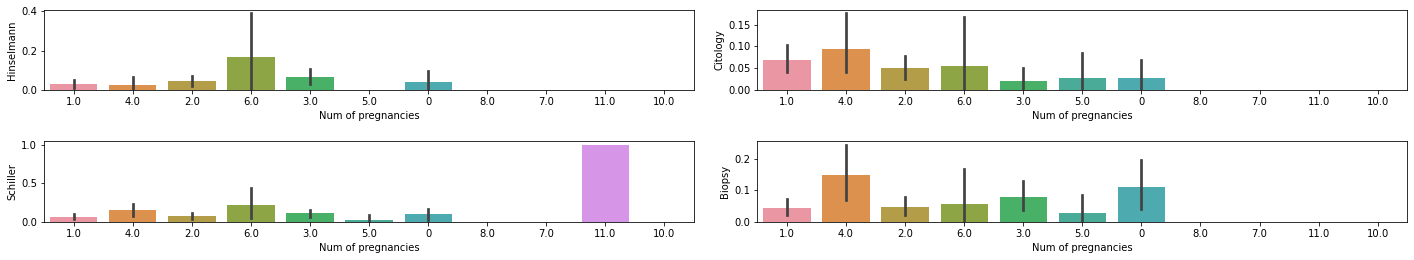

In [23]:
for j in category:
    sns.catplot(x='Num of pregnancies',y='Age',hue=j,data=data,kind='bar')

j=1
fig=plt.figure(figsize=(20,20))

for i in category:
    plt.subplot(11,2,j)
    sns.barplot(x='Num of pregnancies',y=i,data=data)
    j=j+1
    fig.tight_layout(pad=2)          

In general, as Number of pregnancies increases, so does the risk of cancer.

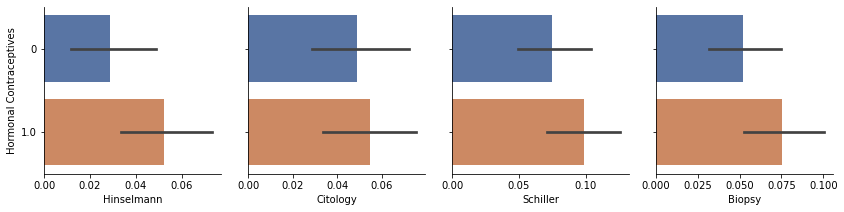

In [24]:

a=sns.PairGrid(data,y_vars=['Hormonal Contraceptives'],x_vars=category,aspect=1,height=3)
a.map(sns.barplot,palette='deep')

We can see that use of Hormonal Contraceptives mostly results in Schiller.

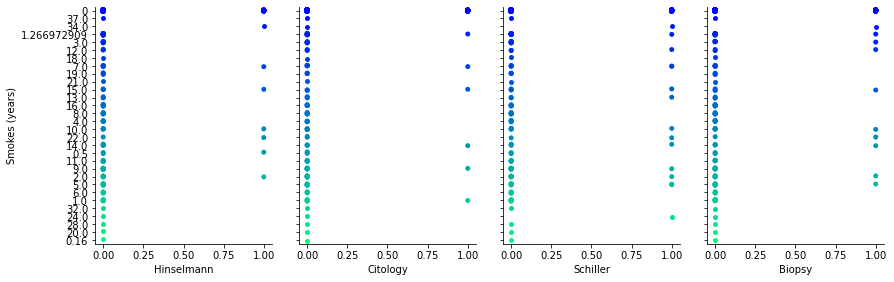

In [25]:
g = sns.PairGrid(data,
                 y_vars=['Smokes (years)'],
                 x_vars= category,
                 aspect=.75, size=4)
g.map(sns.stripplot, palette="winter");


Based on the distribution of data points in the scatter plot, the schiller and Biopsy tests are showing that women who are smoking for more than 5 years are having more chances of getting the tumor.

Mean age women facing the risk of Cervical cancer 27.13228155339806


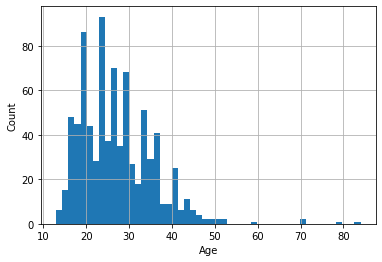

In [26]:
data['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age women facing the risk of Cervical cancer',data['Age'].mean())

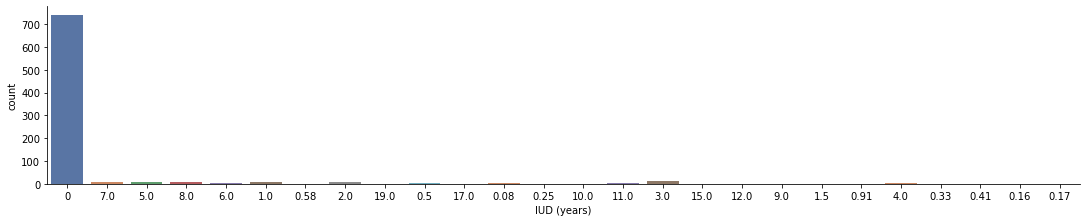

In [27]:
sns.factorplot('IUD (years)',data=data,kind='count',height=3,aspect=5,palette='deep')

Most of the women have had IUD for 3 years. 

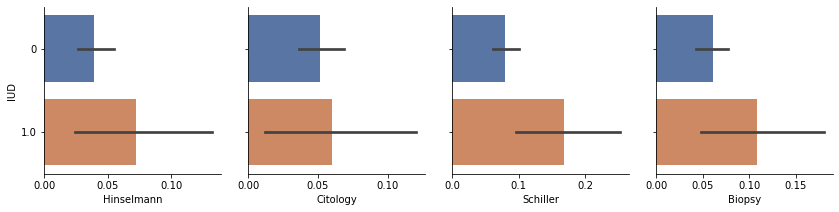

In [28]:
a=sns.PairGrid(data,y_vars=['IUD'],x_vars=category,aspect=1,height=3)
a.map(sns.barplot,palette='deep')

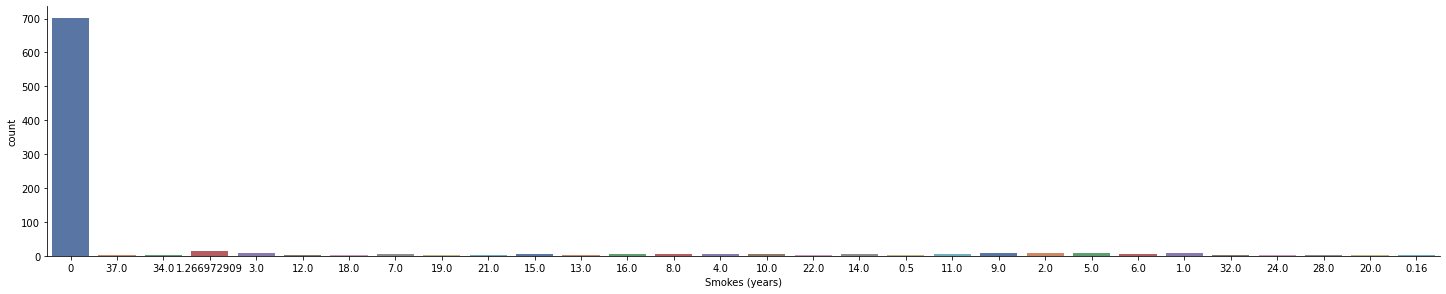

In [29]:
sns.factorplot('Smokes (years)',data=data,kind='count',height=4,aspect=5,palette='deep')

For most of the women who smoke, they've been smoking for an year.

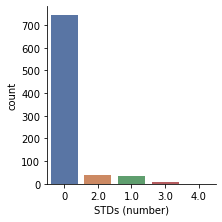

In [30]:
sns.factorplot('STDs (number)',data=data,kind='count',height=3,aspect=1,palette='deep')

For the women having STDs, most have had 1 or 2.

<AxesSubplot:xlabel='Biopsy', ylabel='count'>

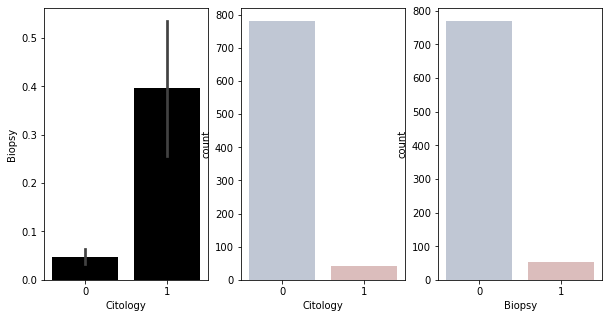

In [31]:
# Biopsy vs citology
fig, (axis1,axis2,axis3) = plt.subplots(1,3, figsize = (10, 5))
sns.barplot(x = 'Citology', y = 'Biopsy', data = data, ax = axis1,color="black")
sns.countplot(x = 'Citology', data=data, ax = axis2,palette="vlag")
sns.countplot(x = 'Biopsy', data = data, ax = axis3,palette="vlag")

<AxesSubplot:xlabel='Biopsy', ylabel='count'>

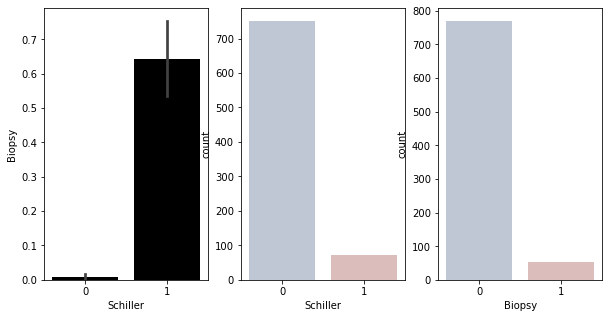

In [32]:
# Biopsy vs schiller

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(10,5))
sns.barplot(x='Schiller', y='Biopsy', data=data, ax=axis1,color="black")
sns.countplot(x='Schiller', data=data, ax=axis2,palette="vlag")
sns.countplot(x='Biopsy', data=data, ax=axis3,palette="vlag")

<AxesSubplot:xlabel='Biopsy', ylabel='count'>

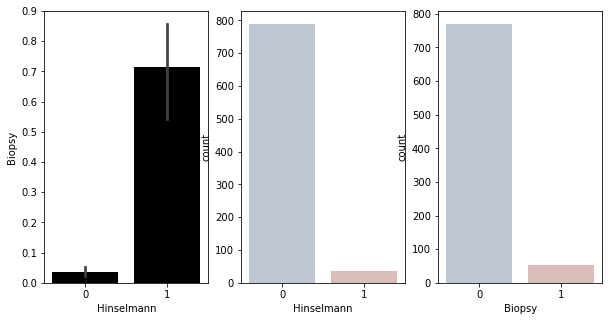

In [33]:
# Biopsy vs Hinselmann

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(10,5))
sns.barplot(x='Hinselmann', y='Biopsy', data=data, ax=axis1,color="black")
sns.countplot(x='Hinselmann', data=data, ax=axis2,palette="vlag")
sns.countplot(x='Biopsy', data=data, ax=axis3,palette="vlag")


## Correlation Matrix

<AxesSubplot:>

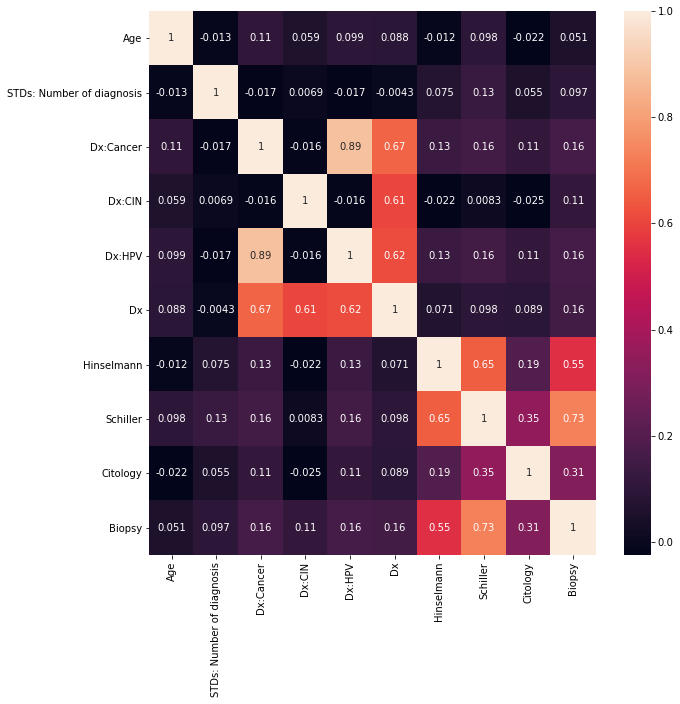

In [34]:
plt.figure(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

### Splitting the dataset into dependent and independent variables

In [35]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(824, 35)
(824,)


### Splitting the dataset into training and test data

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 45)


In [37]:
# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
y_pred_train=model.predict(x_train)
# calculating the training and testing accuracies
print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy :",accuracy_score(y_pred, y_test))

# classification report
print(classification_report(y_train, y_pred_train))

print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9676113360323887
Testing accuracy : 0.9515151515151515
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       460
           1       0.80      0.71      0.75        34

    accuracy                           0.97       494
   macro avg       0.89      0.85      0.87       494
weighted avg       0.97      0.97      0.97       494

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       310
           1       0.67      0.40      0.50        20

    accuracy                           0.95       330
   macro avg       0.81      0.69      0.74       330
weighted avg       0.94      0.95      0.95       330

[[306   4]
 [ 12   8]]


In [38]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('\n')

print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.032388663967611336
Mean Absolute Error           : 0.032388663967611336
Root mean Square Error (RMSE) : 0.17996850826633903


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.048484848484848485
Mean Absolute Error           : 0.048484848484848485
Root mean Square Error (RMSE) : 0.2201927530252721


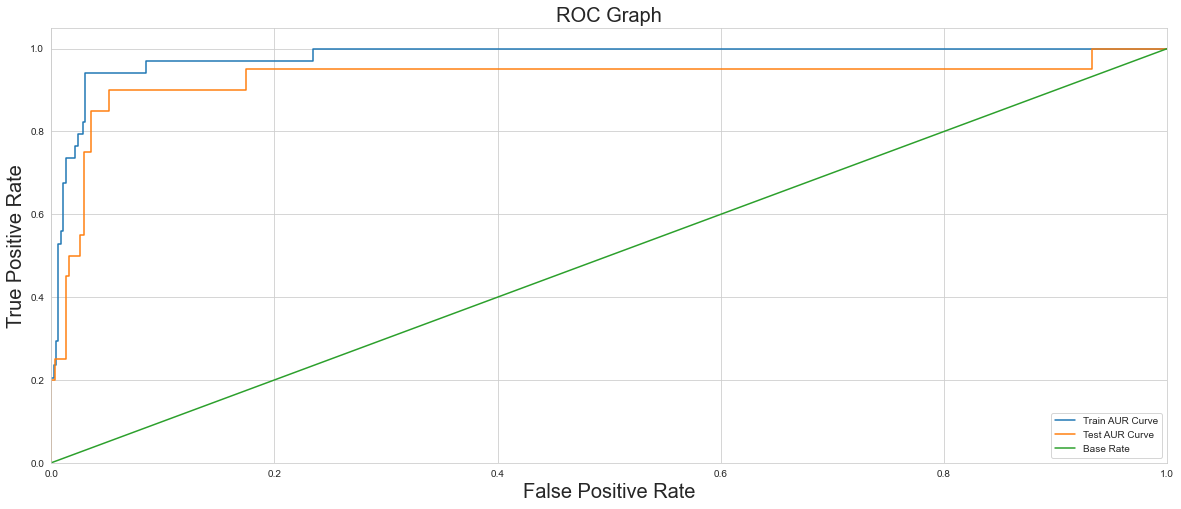

In [39]:
from sklearn.metrics import roc_curve
FPR_lr_train, TPR_lr_train, Thresholds_train = roc_curve(y_train, model.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_lr_train)
tpr_series = pd.Series(TPR_lr_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_lr_test, TPR_lr_test, Thresholds_test = roc_curve(y_test, model.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_lr_test)
tpr_series = pd.Series(TPR_lr_test)
thresholds_series = pd.Series(Thresholds_test)
sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_lr_train, TPR_lr_train, label = 'Train AUR Curve')
plt.plot(FPR_lr_test, TPR_lr_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")

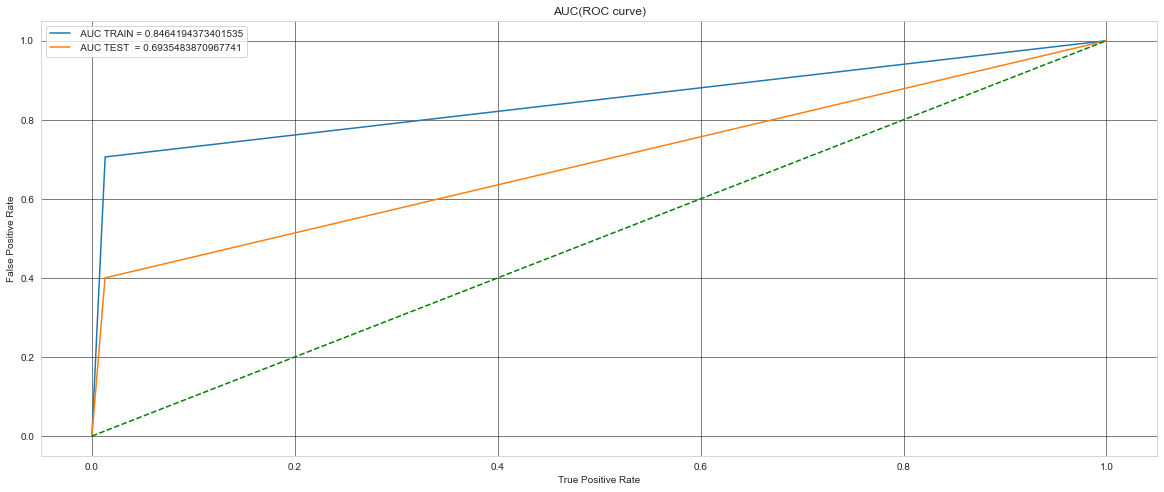

In [40]:
FPR_lr_train, TPR_lr_train, Thresholds_train = roc_curve(y_train, y_pred_train)
FPR_lr_test, TPR_lr_test, Thresholds_test    = roc_curve(y_test, y_pred)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_lr_train, TPR_lr_train, label = " AUC TRAIN = "+str(auc(FPR_lr_train, TPR_lr_train)))
plt.plot(FPR_lr_test, TPR_lr_test,   label = " AUC TEST  = "+str(auc(FPR_lr_test, TPR_lr_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.9454545454545454


In [43]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_dtc_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_dtc_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_dtc_train)))

print('\n')

print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_dtc_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_dtc_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtc_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.0
Mean Absolute Error           : 0.0
Root mean Square Error (RMSE) : 0.0


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.05454545454545454
Mean Absolute Error           : 0.05454545454545454
Root mean Square Error (RMSE) : 0.23354968324845687


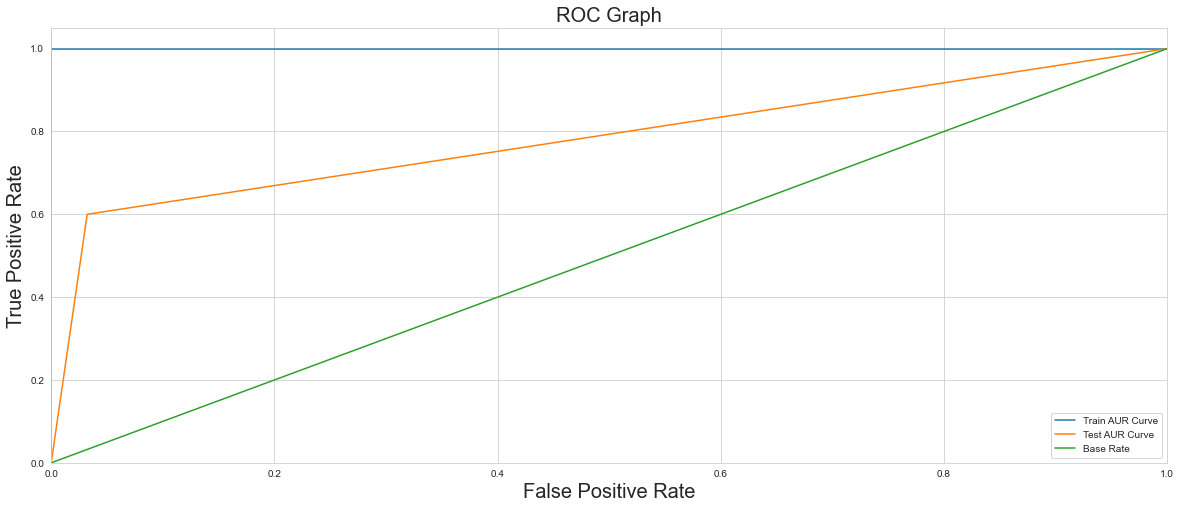

In [44]:
from sklearn.metrics import roc_curve
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train, dtc.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_dtc_train)
tpr_series = pd.Series(TPR_dtc_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_dtc_test, TPR_dtc_test, Thresholds_test = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_dtc_test)
tpr_series = pd.Series(TPR_dtc_test)
thresholds_series = pd.Series(Thresholds_test)
sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_dtc_train, TPR_dtc_train, label = 'Train AUR Curve')
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")

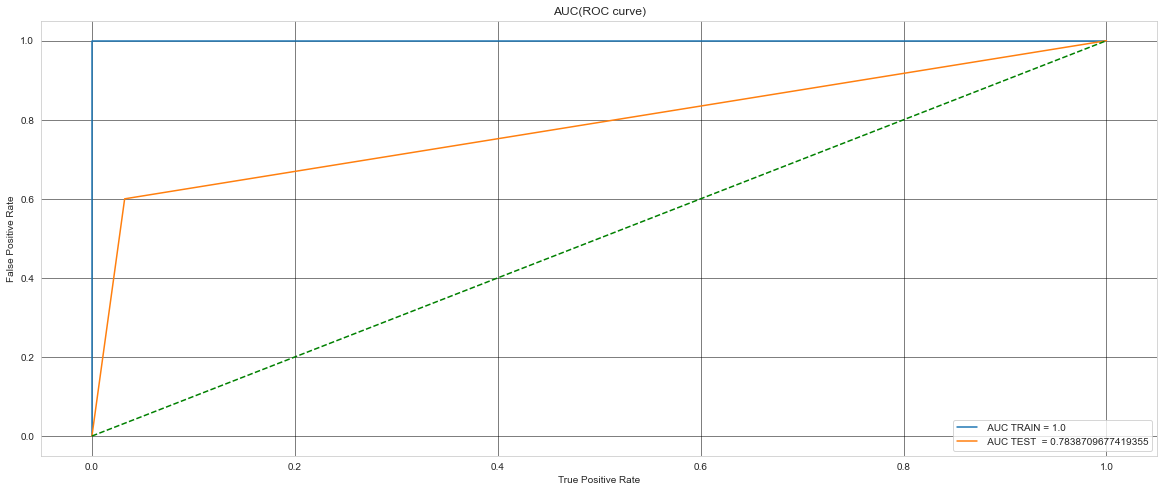

In [45]:
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train,  y_pred_dtc_train)
FPR_dtc_test, TPR_dtc_test, Thresholds_test    = roc_curve(y_test,  y_pred_dtc_test)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_dtc_train, TPR_dtc_train, label = " AUC TRAIN = "+str(auc(FPR_dtc_train, TPR_dtc_train)))
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = " AUC TEST  = "+str(auc(FPR_dtc_test, TPR_dtc_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)


 The dataset had duplicate data, which was removed. Then for convinience, the dataframe was separated into numerical, categorical and category data. Univariate Analysis was performed. It is seen that **Hormonal Contaceptives** play an important role in deciding the risk of cervical cancer; while **'STDs:cervical condylomatosis','STDs:AIDS'** do not appear of much significance.
 
 Also the **time of diagnosis** should not matter, since it cannot decide the risk of cervical cancer.
We observe that in general, as the age increases, the **number of sexual partners** increases, which leads to more risk of cervical cancer.

For increase in the **number of pregnancies**, the risk of cancer seems to have increased.
 Use of **Hormonal Contaceptives** over the years increases the risk of cancer, ,mostly results in Schiller test turning out to be positive. 
 
Based on the distribution of data points in the scatter plot of category vs Smokes, the Schiller and Biopsy tests are showing that women who are **smoking for more than 5 years** are having more chances of getting the  cancer.

Most women have been on the IUD for 3 years. Most women have had 1 or 2 STDs. The **mean age** of women having risk of cancer is **27.**

Thus we can conclude that the women who use Hormonal Contraceptives, have more sexual partners, and have been smoing for more years have more risk of cervical cancer.